In [1]:
import tensorflow as tf
from models import *
from loss import *
from plotting import *
from train import *
from preprocess import *

In [2]:
image_size = 224 
lr_d = 0.0001
lr_g = 0.0001
batch_size = 16
beta1 = 0.5

In [3]:
style_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
content_layers = ['block4_conv2', 'block5_conv2']

In [4]:
path_ds, all_image_paths = get_dataset('/home/anvilarth/ML/Dataset/arcDataset')

In [5]:
buffer_size = len(all_image_paths)

In [6]:
image_ds = path_ds.map(preprocess_image)
ds = image_ds.shuffle(buffer_size).batch(batch_size).prefetch(-1)

In [7]:
discriminator = make_discriminator_model(image_size)
generator = make_generator_model(image_size)

In [8]:
extractor = StyleContentModel(style_layers, content_layers)

In [9]:
discriminator_optimizer = tf.keras.optimizers.Adam(lr_d, beta_1 = beta1)
generator_optimizer = tf.keras.optimizers.Adam(lr_g, beta_1= beta1)

In [10]:
check = read_labels(all_image_paths[100])
innos = check[:, :, :5]
setok = tf.reshape(innos, (1, image_size, image_size, 5))

In [11]:
image = read_labels(all_image_paths[100])

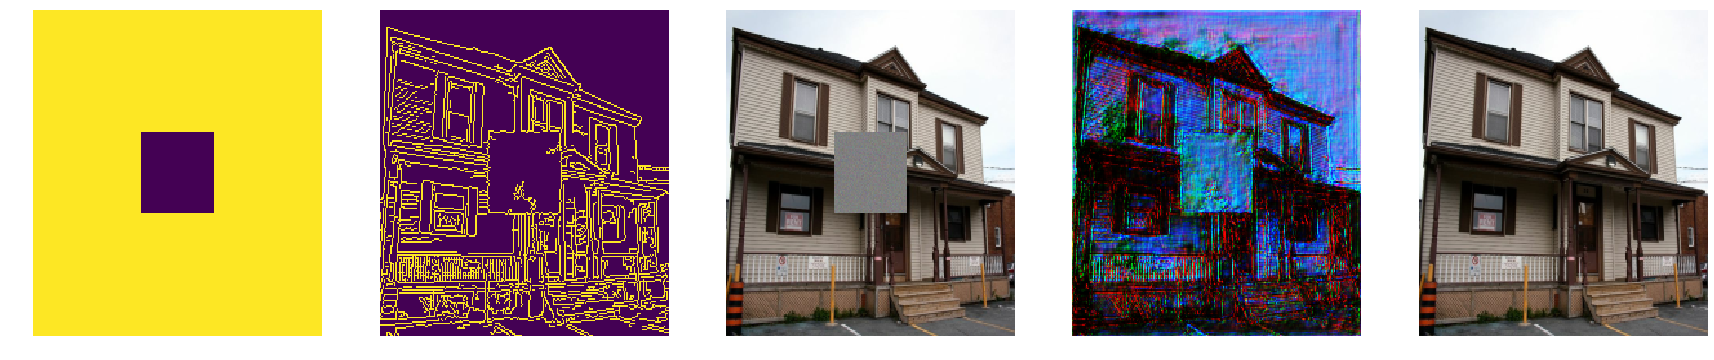

In [12]:
plot_all_images(generator, image)